# Assignment 4 Question 1 (12 marks)
## Name: Devon Puchailo
## Student Number: 11201217

The task in this notebook is to apply and compare two clustering methods: K-Means and Guassian Mixture Models to a familiar dataset.  Since clustering is typically an unsupervised learning task, we'll start by admiring the clusters.  But the training data we'll use has a class label, so in our exercise, we'll be able to compare the clusters found to the true labels.  We'll do this visually.

To complete this question:
1.  Complete **Step 3**
1.  Complete **Step 4**
1.  Answer the questions below.
1.  Make a PDF and submit your Notebook and your PDF to Moodle.


First some libraries...

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Step 1
The ```a4q1.csv``` file is a copy of one of the data files we used earlier in the term.  It has 4 columns: ```index, x, y, L```, where ```L``` represents a label.  The ```x, y``` are continuous quantities, good for plotting in 2D.  We will only use ```L``` to colourize our figures.

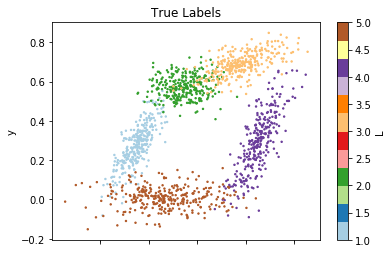

In [12]:
df = pd.read_csv('a4q1.csv', index_col=0)

# Plot the data with each label 'L' getting a different color

#Here we can choose a global colormap, to help visualization
# see https://matplotlib.org/tutorials/colors/colormaps.html
cmapstr = 'Paired'

# here we choose how big each point in the plot will be
ptsize = 2

df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr,s=ptsize, title='True Labels')
plt.show()

## Step 2
Now we'll strip off the labels, and set up some variables for use by the fitting methods.

In [13]:
# just the input features
X_df = df[['x', 'y']]

# just the labels.
L_df = df['L']

# the number of true classes in the data
n_classes = len(np.unique(L_df))

# the number of clusters to seek; experiment with this!
n_components = n_classes

## Step 3
Fit the KMeans model to the features of the data set.

In [14]:
from sklearn.cluster import KMeans

# create the model object
kmeans_estimator = KMeans(init='k-means++', max_iter=300, n_clusters=5)

                
# fit on all the data
kmeans_estimator.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Step 4
Fit the GMM model to the features of the data set.

In [15]:
from sklearn.mixture import GaussianMixture

# create the model object
gmm_estimator = GaussianMixture(init_params='kmeans', n_components=5)
                                
# fit on all the data
gmm_estimator.fit(X_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

## Step 5
Plot the centroids along with the labelled data.

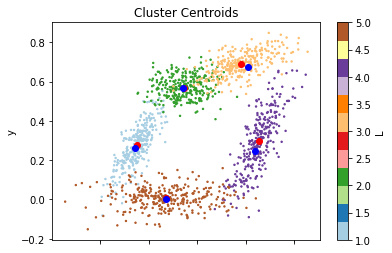

In [16]:
# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')

# plot GMM centroids in red
for centroid in gmm_estimator.means_:
    plt.plot(centroid[0], centroid[1], 'ro')

# plot Kmeans centroids in blue
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

## Questions
1.  The ```KMeans``` method allows us to indicate how the initial centroids are chosen:
  * ```init='k-means++'``` (this is the default behaviour)
  * ```init='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.  When you're done, return to the default behaviour for the next part.

2. The ```GMM``` method allows us to indicate how the initial centroids are chosen:
  * ```init_params='kmeans'``` (this is the default behaviour)
  * ```init_params='random'``` (you have to ask for this explicitly)
  
  Using the random initialization, re-run the notebook, and explain the differences that you see.

## Answers
1.  I didn't notice a huge difference between using k-means++ and random initial states. With a high tolerance, there was a slight difference. However, with the default tolerance, there really wasn't any difference. Examples are shown below. 

2. When running GMM with random starting positions, my model was unable to locate the centroids to a respectable position within 100000 itererations. They just all stayed in the center of the screen. I initially saw this behaviour with 100 iterations, however increasing the amount of iterations to 100000 did not seem to increase this. This suggests that, by using random, we hit a local maximazation in our hill-climbing algorithm. This local maximization just happened to be in the center of the dataset for each centroid. 
    It's important to note that, when increasing my max iterations to 1000, and decreasing my tolerance, I was able to approximate respectable centroid positions. This suggests that, by using random start states, we need to allow slower movement and more iterations in order to achieve our goal. 

## K-means messing-around-with

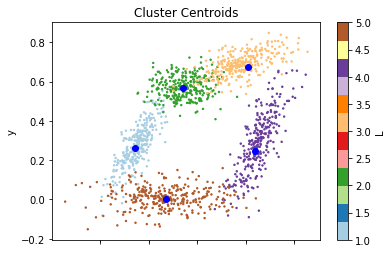

In [17]:
# create the model object
kmeans_estimator = KMeans(init='random', max_iter=300, n_clusters=5)

# fit on all the data
kmeans_estimator.fit(X_df)
# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()


As we can see here, by turning our init to random, we don't see a huge difference between when we use k-means++. Howeve,r, if we increase the tolerance, we do see a difference. 

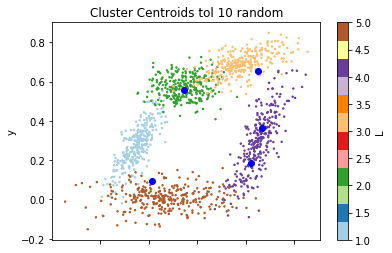

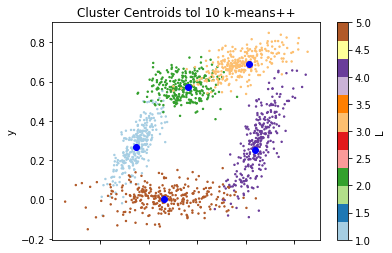

In [18]:
kmeans_estimator = KMeans(init='random', max_iter=300, n_clusters=5, tol=10)
# fit on all the data
kmeans_estimator.fit(X_df)
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids tol 10 random')
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

kmeans_estimator = KMeans(init='k-means++', max_iter=300, n_clusters=5, tol=10)
# fit on all the data
kmeans_estimator.fit(X_df)
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids tol 10 k-means++')
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

As we can see here, we don't get a very big difference even with a higher tolerance. This suggests that the difference between k-means++ and random initial states is minor. 

## GMM messing-around-with

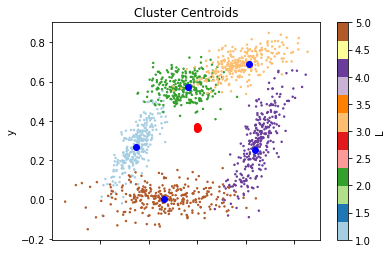

In [19]:
gmm_estimator = GaussianMixture(init_params='random', n_components=5)
                                

# fit on all the data
gmm_estimator.fit(X_df)

# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')

# plot GMM centroids in red
for centroid in gmm_estimator.means_:
    plt.plot(centroid[0], centroid[1], 'ro')

# plot Kmeans centroids in blue
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

Above: Example of the random case, where everything goes to the center. 

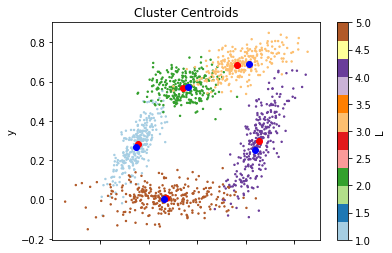

In [20]:
gmm_estimator = GaussianMixture(init_params='random', n_components=5, tol=0.00001, max_iter=1000)                
# fit on all the data
gmm_estimator.fit(X_df)

# Plot the data again, using the cluster centers 
df.plot.scatter(x='x', y='y',c='L',colormap=cmapstr, s=ptsize, title='Cluster Centroids')

# plot GMM centroids in red
for centroid in gmm_estimator.means_:
    plt.plot(centroid[0], centroid[1], 'ro')

# plot Kmeans centroids in blue
for centroid in kmeans_estimator.cluster_centers_:
    plt.plot(centroid[0], centroid[1], 'bo')

plt.show()

Example of my 'fix' for the random start. As you can see, with this low of a tolerance and this many iterations, we're able to better approximate where the centroids should be. However, this is clearly not as good as when we start with kmeans. By using kmeans, we're able to achieve better results is a shorter amount of time, with a lower tolerance. 

## Grading: 12 marks
1. Step 3. 3 marks.
1. Step 4. 3 marks.
1. Answer to quesiton 1 above (3 marks).
1. Answer to quesiton 2 above (3 marks).